In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
import operator

In [3]:
summary = pd.read_excel('XYZ-1.xlsx', 'summary')
df = pd.read_excel('XYZ-1.xlsx', 'Data')
demand = df[6:]

In [4]:
summary

,Lead time,starting stock,Probability,Demand_lead,Mean,Std Dev
0,9,2750,1,705,103.501805,37.317994
1,6,22500,1,3891,648.551913,26.447970
2,16,5200,1,2266,201.677043,31.079301
3,22,1400,1,785,150.068965,3.215598


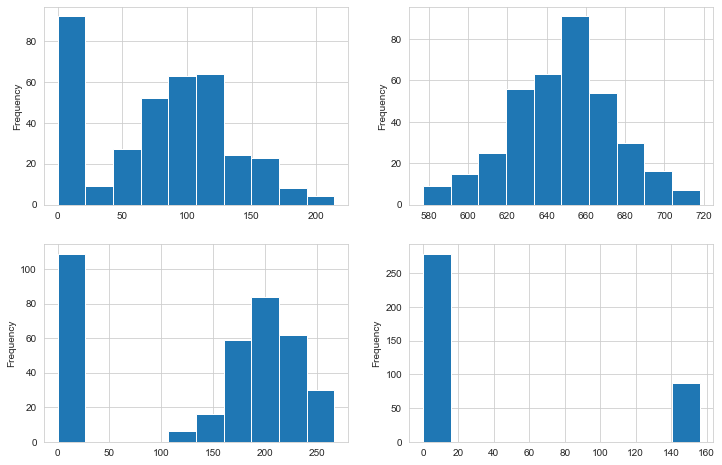

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
demand[1].plot.hist(ax=axes[0, 0])
demand[2].plot.hist(ax=axes[0, 1])
demand[3].plot.hist(ax=axes[1, 0])
demand[4].plot.hist(ax=axes[1, 1])

In [6]:
class Product:
    def __init__(self, i):
        """
        :type i: int - Product number
        """
        self.i = i
        self.lead_time = summary['Lead time'].iloc[i - 1]
        self.probability = summary['Probability'].iloc[i - 1]
        self.starting_stock = summary['starting stock'].iloc[i - 1]
        self.demand_lead = summary['Demand_lead'].iloc[i - 1]

        self.mean = np.mean([np.log(j) for j in demand[demand[i] > 0][i]])
        self.sd = np.std([np.log(j) for j in demand[demand[i] > 0][i]])

In [7]:
def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)
    if random_num > probability:
        return 0
    else:
        return np.exp(np.random.normal(mean, sd))

In [8]:
product_1 = Product(1)

In [9]:
def reple(M, product, review_period=30):
    inventory = product.starting_stock
    mean = product.mean
    sd = product.sd
    lead_time = product.lead_time
    probability = product.probability
    demand_lead = product.demand_lead

    q = 0
    stock_out = 0
    counter = 0
    order_placed = False
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'orders': []}

    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        data['daily_demand'].append(day_demand)

        if day % review_period == 0:
            # Placing the order
            q = M - inventory + demand_lead
            order_placed = True
            data['orders'].append(q)
            
            
        if order_placed:
            counter += 1
        
        if counter == lead_time:
            # Restocking day
            inventory += q
            order_placed = False
            counter = 0

        if inventory - day_demand >= 0:
            inventory -= day_demand
        elif inventory - day_demand < 0:
            inventory = 0
            stock_out += 1

        data['inv_level'].append(inventory)

    return data


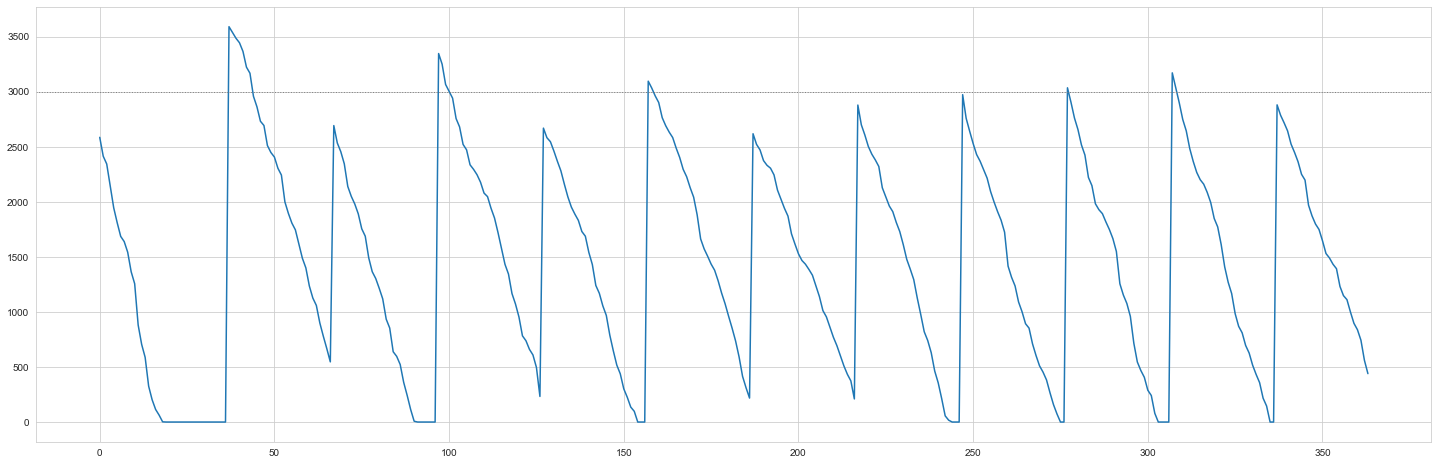

In [10]:
data = reple(3000, product_1)
plt.figure(figsize=(25,8))
plt.plot(data['inv_level'])
plt.axhline(3000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [11]:
print (data['inv_level'])

[2585.522176029775, 2413.9850907374125, 2343.272535565149, 2142.503448523668, 1945.53017089028, 1809.832269562252, 1685.852069231725, 1639.0078843643926, 1542.4645948089244, 1364.6426143675258, 1256.1224249229258, 881.1275149523077, 705.0838303593234, 587.3292235340166, 325.84883221762317, 202.14763761567394, 114.08678734578905, 62.61035565207957, 1.842081034103849, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3590.279554817175, 3537.847863853074, 3485.2043312897335, 3444.3671984975435, 3365.5785554257677, 3222.7113200605477, 3167.537100316708, 2958.310896279249, 2862.651037596174, 2731.5692238807724, 2693.0302913506334, 2510.865122777217, 2447.4908309125176, 2406.3167827159778, 2304.795382975331, 2242.7736524248867, 1999.1211669553588, 1894.5549637260083, 1806.7028740624487, 1745.4095076699614, 1614.9370123020221, 1487.8490988640312, 1399.8530225211648, 1235.1710343296709, 1125.7784925160086, 1059.2227119816241, 899.6203820968409, 779.073619929604, 666.1048082096668, 546.3905

In [12]:
print (data['orders'])

[3705, 2217.1509011359685, 3463.293234970144, 2538.2669754948274, 3187.617078667975, 2533.6370312951803, 2750.2030345864086, 3074.9849147205714, 3100.8085655496147, 3236.77843860542, 3009.6092058341, 2705.77430001738]
